In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
table = pd.read_csv("https://raw.githubusercontent.com/philippe2023/vanguard_analysis_ab_test/main/data/clean/final_df.csv")
table 

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,year,date,time
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13,2017,2017-04-02,11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50,2017,2017-04-02,11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,2017,2017-04-02,11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08,2017,2017-04-02,11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,2017,2017-04-02,11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449699,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,undefined,962766819_57063135389,158544612_4105226940_43043,confirm,2017-04-05 11:48:02,2017,2017-04-05,11:48:02
449700,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,undefined,962766819_57063135389,158544612_4105226940_43043,step_3,2017-04-05 11:44:07,2017,2017-04-05,11:44:07
449701,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,undefined,962766819_57063135389,158544612_4105226940_43043,step_2,2017-04-05 11:43:10,2017,2017-04-05,11:43:10
449702,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,undefined,962766819_57063135389,884309593_49820690623_654151,step_1,2017-04-05 11:41:32,2017,2017-04-05,11:41:32


  age_group  completion_rate
0     30-50        14.059921
1     51-70        12.984266


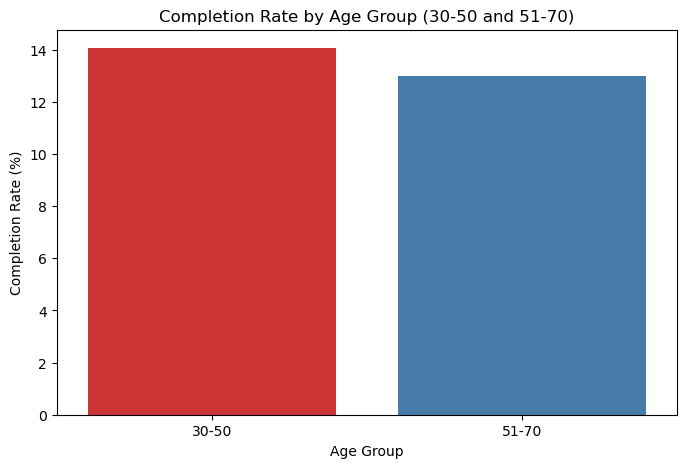

In [3]:
# Define the new age ranges for two age groups: 30-50 and 51-70
age_bins_custom = [30, 50, 70]
age_labels_custom = ['30-50', '51-70']

# Create the custom age group column based on these bins
table['age_group_custom'] = pd.cut(table['clnt_age'], bins=age_bins_custom, labels=age_labels_custom, right=False)

# Calculate completion rate for the two age groups
completion_rate_custom_age = table[table['process_step'] == 'confirm'].groupby('age_group_custom')['client_id'].count() / table.groupby('age_group_custom')['client_id'].count() * 100

# Reset the index for a cleaner display
completion_rate_custom_age = completion_rate_custom_age.reset_index()
completion_rate_custom_age.columns = ['age_group', 'completion_rate']

# Display the DataFrame
print(completion_rate_custom_age)

# Plot the completion rate by these two age groups
plt.figure(figsize=(8, 5))
sns.barplot(x='age_group', y='completion_rate', data=completion_rate_custom_age, palette="Set1")
plt.title('Completion Rate by Age Group (30-50 and 51-70)')
plt.ylabel('Completion Rate (%)')
plt.xlabel('Age Group')
plt.show()

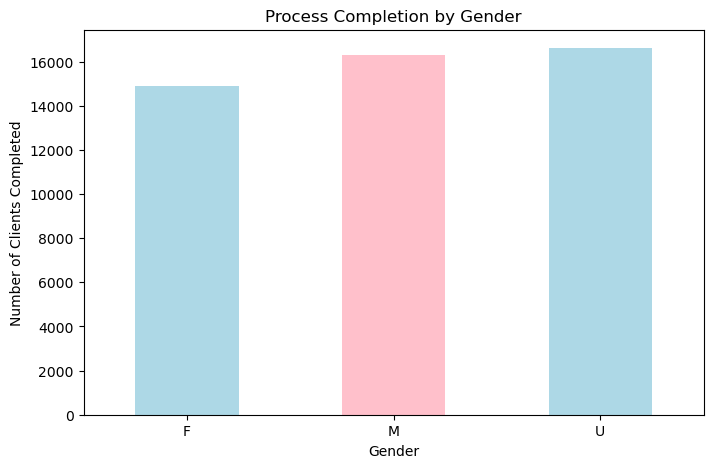

In [4]:
# Filter the final step of the process (e.g., 'confirm')
completion_df = table[table['process_step'] == 'confirm']

# Group by gender to see how many clients of each gender complete the process
gender_completion = completion_df.groupby('gendr')['client_id'].nunique()

# Plot the gender completion rates
plt.figure(figsize=(8, 5))
gender_completion.plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Process Completion by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Clients Completed')
plt.xticks(rotation=0)
plt.show()


In [5]:
# Completion rate calculation
completion_rate = (table['process_step'] == 'confirm').mean() * 100
print(f"Completion Rate: {completion_rate:.2f}%")

Completion Rate: 13.46%


  age_group  completion_rate
0       <30        14.095407
1     30-45        14.192349
2     45-60        13.224643
3     60-75        12.668096
4       >75        12.244302


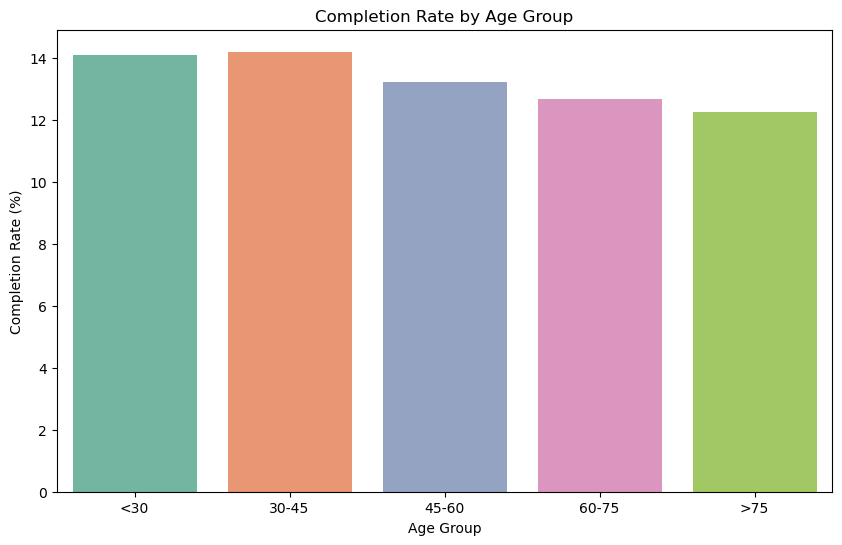

In [6]:
# Let's calculate the completion rate by age group using the Vanguard dataset.

# First, create age bins to group clients by age
age_bins = [0, 30, 45, 60, 75, 100]  # Defining the age ranges
age_labels = ['<30', '30-45', '45-60', '60-75', '>75']  # Labels for the bins
table['age_group'] = pd.cut(table['clnt_age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the completion rate by age group
completion_rate_by_age = table[table['process_step'] == 'confirm'].groupby('age_group')['client_id'].count() / table.groupby('age_group')['client_id'].count() * 100

# Reset index for a cleaner display
completion_rate_by_age = completion_rate_by_age.reset_index()
completion_rate_by_age.columns = ['age_group', 'completion_rate']

# Display the DataFrame
print(completion_rate_by_age)

# Plot the completion rate by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='completion_rate', data=completion_rate_by_age, palette="Set2")
plt.title('Completion Rate by Age Group')
plt.ylabel('Completion Rate (%)')
plt.xlabel('Age Group')
plt.show()


  age_group  Variation  completion_rate
0     30-50    Control        12.568090
1     30-50       Test        14.959304
2     30-50  undefined        13.966605
3     50-70    Control        12.092217
4     50-70       Test        13.761911
5     50-70  undefined        12.907347


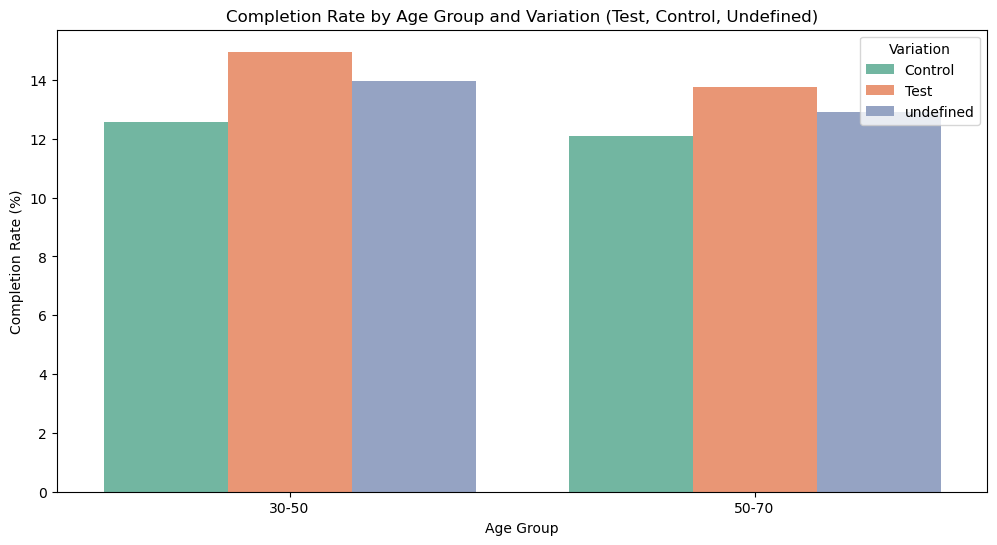

In [17]:
# Step 1: Calculate the completion rate by age group and variation
completion_rate_by_age_variation = table[table['process_step'] == 'confirm'].groupby(['age_group', 'Variation'])['client_id'].count() / table.groupby(['age_group', 'Variation'])['client_id'].count() * 100

# Reset index for a cleaner DataFrame
completion_rate_by_age_variation = completion_rate_by_age_variation.reset_index()
completion_rate_by_age_variation.columns = ['age_group', 'Variation', 'completion_rate']
age_bins = [30, 50, 70]
age_labels = ['30-50', '50-70']

# Display the DataFrame
print(completion_rate_by_age_variation)

# Step 2: Plot the completion rate by age group and variation
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='completion_rate', hue='Variation', data=completion_rate_by_age_variation, palette="Set2")

# Add labels and title
plt.title('Completion Rate by Age Group and Variation (Test, Control, Undefined)')
plt.xlabel('Age Group')
plt.ylabel('Completion Rate (%)')

# Show the plot
plt.show()


   age_group  Variation gendr  completion_rate
0      30-50    Control     F        12.511909
1      30-50    Control     M        12.760687
2      30-50    Control     U        12.426648
3      30-50    Control     X              NaN
4      30-50       Test     F        14.403754
5      30-50       Test     M        15.524261
6      30-50       Test     U        14.918090
7      30-50       Test     X              NaN
8      30-50  undefined     F        13.865323
9      30-50  undefined     M        14.319854
10     30-50  undefined     U        13.671762
11     30-50  undefined     X              NaN
12     50-70    Control     F        11.992412
13     50-70    Control     M        12.508620
14     50-70    Control     U        11.666770
15     50-70    Control     X              NaN
16     50-70       Test     F        13.576330
17     50-70       Test     M        14.239602
18     50-70       Test     U        13.399167
19     50-70       Test     X              NaN
20     50-70 

C:\Users\joelk\AppData\Local\Temp\ipykernel_30452\2623767259.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='completion_rate', hue='Variation', data=completion_rate_by_age_variation_gender, palette="Set2", ci=None)


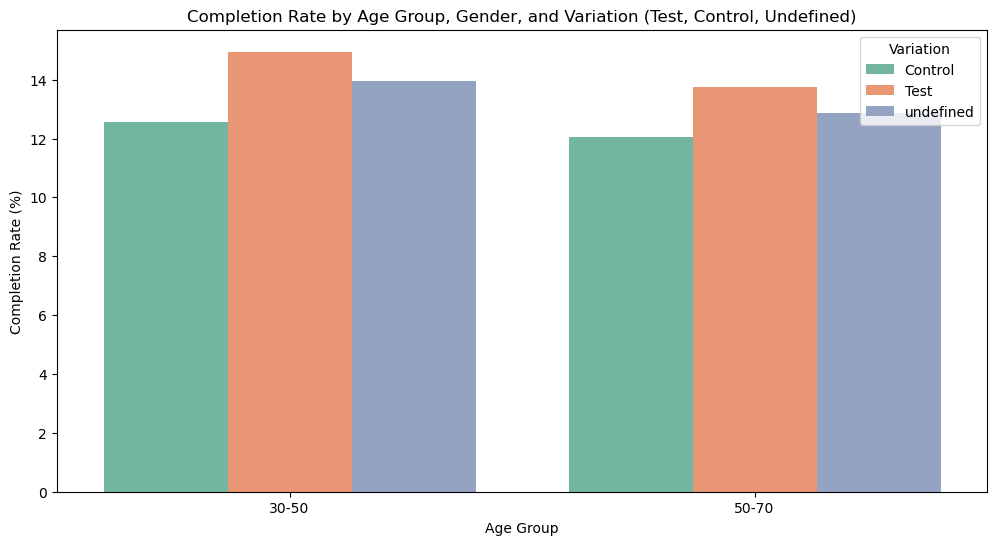

In [19]:
# Step 1: Calculate the completion rate by age group, variation, and gender
completion_rate_by_age_variation_gender = table[table['process_step'] == 'confirm'].groupby(['age_group', 'Variation', 'gendr'])['client_id'].count() / table.groupby(['age_group', 'Variation', 'gendr'])['client_id'].count() * 100

# Reset index for a cleaner DataFrame
completion_rate_by_age_variation_gender = completion_rate_by_age_variation_gender.reset_index()
completion_rate_by_age_variation_gender.columns = ['age_group', 'Variation', 'gendr', 'completion_rate']
age_bins = [30, 50, 70]
age_labels = ['30-50', '50-70']


# Display the DataFrame to check
print(completion_rate_by_age_variation_gender)

# Step 2: Plot the completion rate by age group, variation, and gender
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='completion_rate', hue='Variation', data=completion_rate_by_age_variation_gender, palette="Set2", ci=None)

# Add labels and title
plt.title('Completion Rate by Age Group, Gender, and Variation (Test, Control, Undefined)')
plt.xlabel('Age Group')
plt.ylabel('Completion Rate (%)')

# Show the plot
plt.show()

C:\Users\joelk\.conda\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\joelk\.conda\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


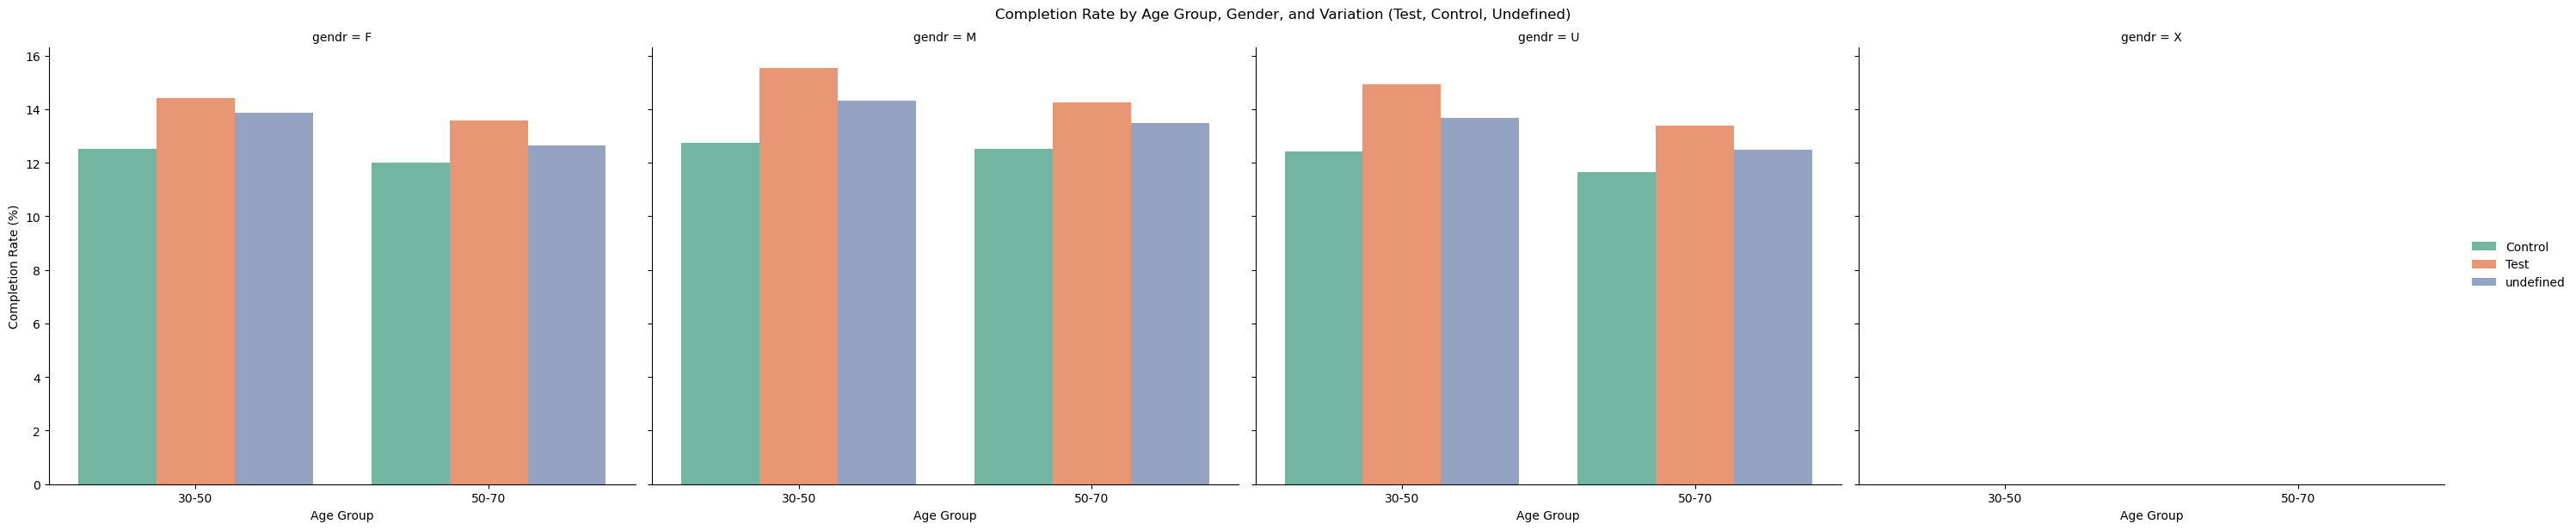

In [20]:
g = sns.FacetGrid(completion_rate_by_age_variation_gender, col="gendr", height=6, aspect=1.2)
g.map(sns.barplot, "age_group", "completion_rate", "Variation", palette="Set2")
g.add_legend()
age_bins = [30, 50, 70]
age_labels = ['30-50', '50-70']
# Add labels and title
g.fig.suptitle('Completion Rate by Age Group, Gender, and Variation (Test, Control, Undefined)', y=1.02)
g.set_axis_labels('Age Group', 'Completion Rate (%)')

plt.show()


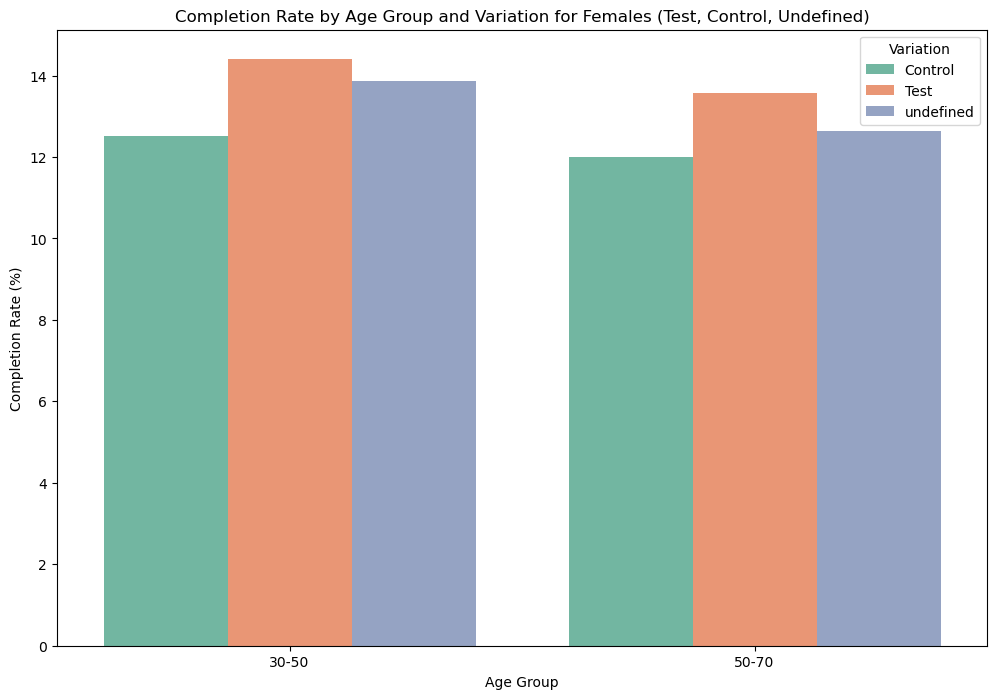

In [21]:
# Filter the data for gender = 'F' (Female)
completion_rate_female = completion_rate_by_age_variation_gender[completion_rate_by_age_variation_gender['gendr'] == 'F']

# Plot the completion rate by age group and variation for females
plt.figure(figsize=(12, 8))
sns.barplot(x='age_group', y='completion_rate', hue='Variation', data=completion_rate_female, palette="Set2")
age_bins = [30, 50, 70]
age_labels = ['30-50', '50-70']
# Add labels and title
plt.title('Completion Rate by Age Group and Variation for Females (Test, Control, Undefined)')
plt.xlabel('Age Group')
plt.ylabel('Completion Rate (%)')

# Show the plot
plt.show()

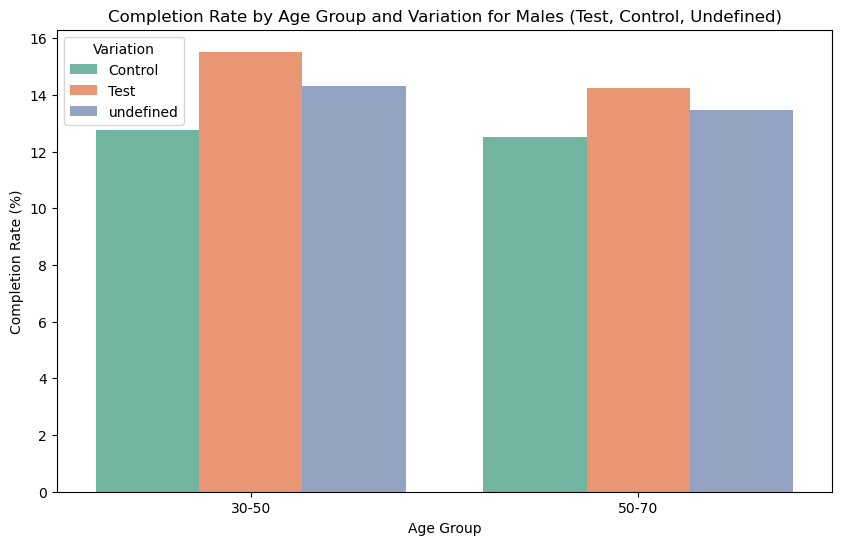

In [22]:
# Filter the data for gender = 'M' (Male)
completion_rate_male = completion_rate_by_age_variation_gender[completion_rate_by_age_variation_gender['gendr'] == 'M']

# Plot the completion rate by age group and variation for males
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='completion_rate', hue='Variation', data=completion_rate_male, palette="Set2")
age_bins = [30, 50, 70]
age_labels = ['30-50', '50-70']
# Add labels and title
plt.title('Completion Rate by Age Group and Variation for Males (Test, Control, Undefined)')
plt.xlabel('Age Group')
plt.ylabel('Completion Rate (%)')

# Show the plot
plt.show()

C:\Users\joelk\.conda\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\joelk\.conda\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\joelk\.conda\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\joelk\.conda\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\joelk\.conda\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\joelk\.conda\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


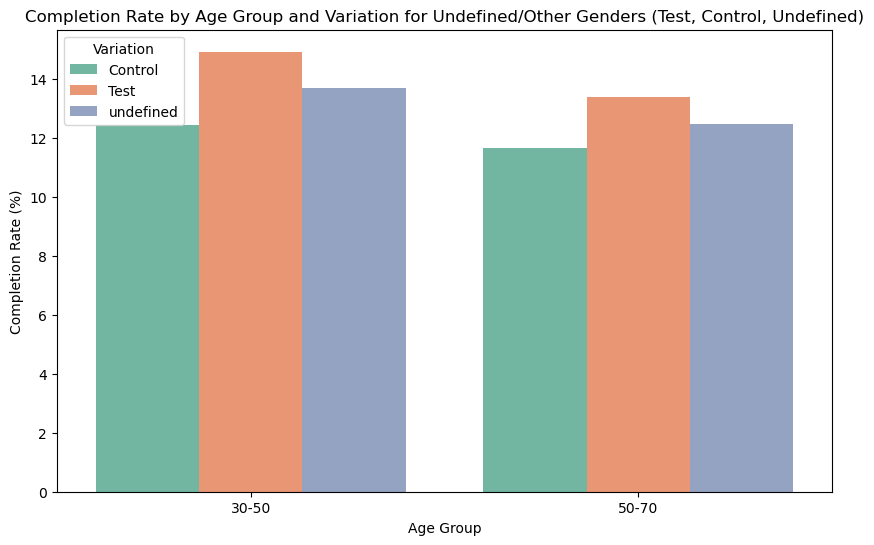

In [23]:
# Filter the data for other or undefined genders
completion_rate_other = completion_rate_by_age_variation_gender[completion_rate_by_age_variation_gender['gendr'].isin(['U', 'X'])]

# Plot the completion rate by age group and variation for undefined/other genders
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='completion_rate', hue='Variation', data=completion_rate_other, palette="Set2")
age_bins = [30, 50, 70]
age_labels = ['30-50', '50-70']
# Add labels and title
plt.title('Completion Rate by Age Group and Variation for Undefined/Other Genders (Test, Control, Undefined)')
plt.xlabel('Age Group')
plt.ylabel('Completion Rate (%)')

# Show the plot
plt.show()

###  Drop-off rate

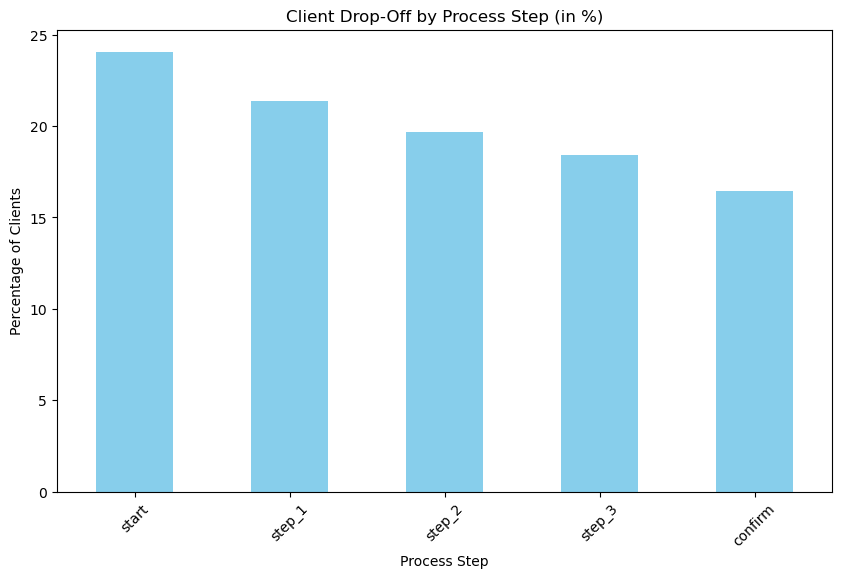

In [13]:
# Step 1: Group by process steps and calculate the number of clients at each step
process_step_counts = table.groupby('process_step')['client_id'].nunique()

# Step 2: Sort the process steps in the desired order
ordered_steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
process_step_counts = process_step_counts.reindex(ordered_steps)

# Step 3: Convert the counts to percentages
total_clients = process_step_counts.sum()  # Get the total number of clients
process_step_counts_percentage = (process_step_counts / total_clients) * 100  # Convert to percentages

# Step 4: Plot the data
plt.figure(figsize=(10, 6))
process_step_counts_percentage.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Client Drop-Off by Process Step (in %)')
plt.xlabel('Process Step')
plt.ylabel('Percentage of Clients')
plt.xticks(rotation=45)

# Show the plot
plt.show()


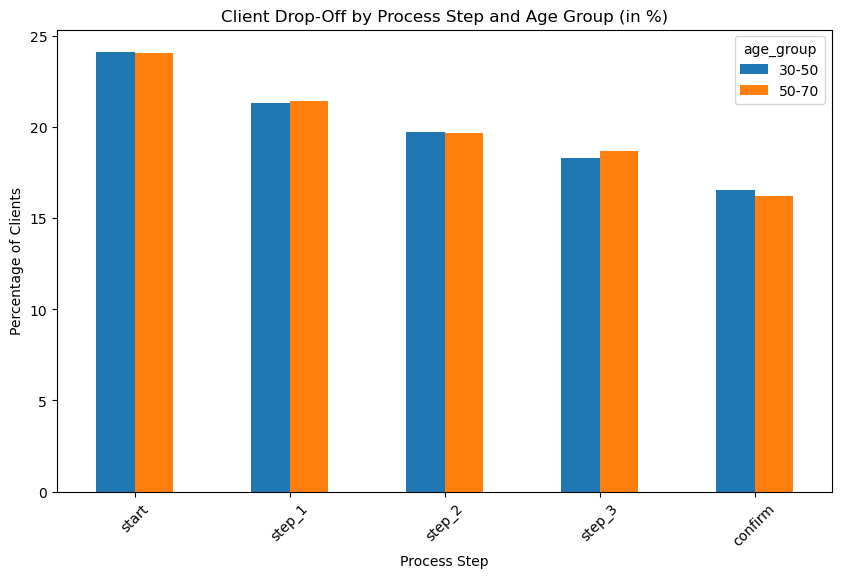

In [14]:
# Step 1: Create an age group column for the two specific groups
table['age_group'] = pd.cut(table['clnt_age'], bins=[30, 50, 70], labels=['30-50', '50-70'], include_lowest=True)

# Step 2: Filter out the rows where the age group is NaN
filtered_table = table[table['age_group'].notnull()]

# Step 3: Group by process step and age group and calculate the number of unique clients
process_step_age_counts = filtered_table.groupby(['process_step', 'age_group'])['client_id'].nunique().unstack()

# Step 4: Sort the process steps in the desired order
ordered_steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
process_step_age_counts = process_step_age_counts.reindex(ordered_steps)

# Step 5: Convert the counts to percentages for each age group
process_step_age_counts_percentage = process_step_age_counts.div(process_step_age_counts.sum()) * 100

# Step 6: Plot the data using a grouped bar chart
process_step_age_counts_percentage.plot(kind='bar', figsize=(10,6))

# Add labels and title
plt.title('Client Drop-Off by Process Step and Age Group (in %)')
plt.xlabel('Process Step')
plt.ylabel('Percentage of Clients')
plt.xticks(rotation=45)

# Show the plot
plt.show()

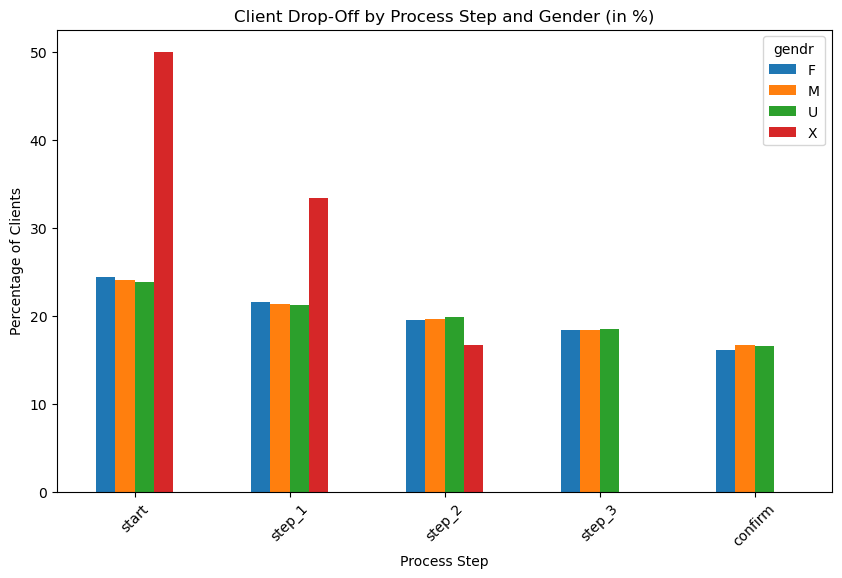

In [15]:
# Step 1: Group by process step and gender and calculate the number of unique clients
process_step_gender_counts = table.groupby(['process_step', 'gendr'])['client_id'].nunique().unstack()

# Step 2: Sort the process steps in the desired order
ordered_steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
process_step_gender_counts = process_step_gender_counts.reindex(ordered_steps)

# Step 3: Convert the counts to percentages for each gender
process_step_gender_counts_percentage = process_step_gender_counts.div(process_step_gender_counts.sum()) * 100

# Step 4: Plot the data using a grouped bar chart
process_step_gender_counts_percentage.plot(kind='bar', figsize=(10,6))

# Add labels and title
plt.title('Client Drop-Off by Process Step and Gender (in %)')
plt.xlabel('Process Step')
plt.ylabel('Percentage of Clients')
plt.xticks(rotation=45)

# Show the plot
plt.show()

### process completion rate

Variation    Control       Test  undefined
age_group                                 
30-50      12.568090  14.959304  13.966605
50-70      12.092217  13.761911  12.907347


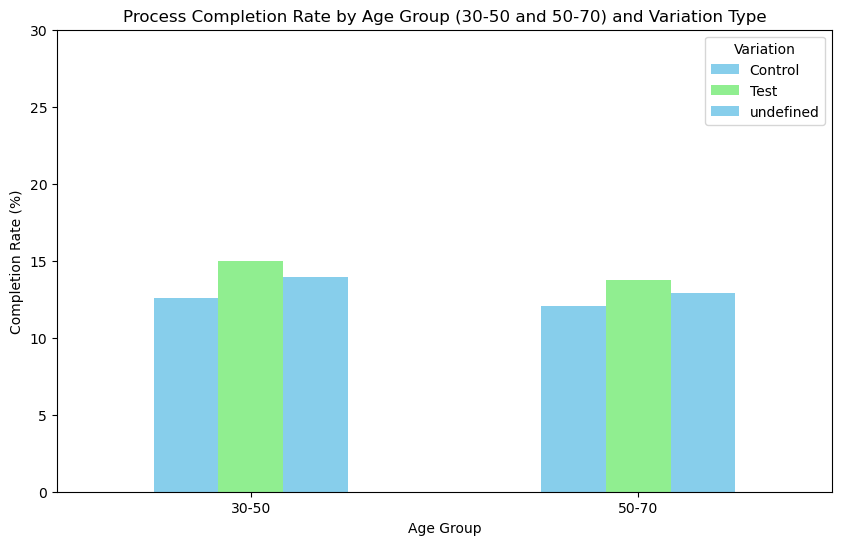

In [16]:
# Step 1: Define the age groups of interest and create a new column for age group
table['age_group'] = pd.cut(table['clnt_age'], bins=[30, 50, 70], labels=['30-50', '50-70'], include_lowest=True)

# Step 2: Filter out the data for these two age groups
filtered_data = table[table['age_group'].notnull()]

# Step 3: Define the final process step that indicates completion (assuming it's 'confirm')
final_step = 'confirm'

# Step 4: Calculate the completion rate by age group and variation type and convert to percentages
completion_rate = filtered_data.groupby(['age_group', 'Variation'])['process_step'].apply(
    lambda x: (x == final_step).mean() * 100).unstack()
print (completion_rate)
# Step 5: Plot the completion rate using a grouped bar chart
completion_rate.plot(kind='bar', figsize=(10,6), color=['skyblue', 'lightgreen'])

# Add labels and title
plt.title('Process Completion Rate by Age Group (30-50 and 50-70) and Variation Type')
plt.xlabel('Age Group')
plt.ylabel('Completion Rate (%)')  # Show percentages in the label
plt.ylim(0, 30)  # Adjust y-axis for percentage scale (0-100)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Show the plot
plt.show()
